# FLIP (02) Optimization Data Science

---
Team Director: Meng Ren | mren@tulip.academy<br />

TULIP Academy <br />
http://www.tulip.academy 

---

# Iterative Methods

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['figure.figsize'] = (12,6)

$$
\newcommand{\bb}{{\boldsymbol{b}}}
\newcommand{\bx}{{\boldsymbol{x}}}
\newcommand{\by}{{\boldsymbol{y}}}
$$

The *direct* methods (such as Gaussian Elimination and $LU$ decomposition) we have introduced to solve the linear system

\begin{equation}
     A \bx = \bb.
\end{equation}
 
require ${\cal O}(n^3)$ operations. For large matrices this takes time and each operation introduces error that
   may accumulate. Other methods may be preferable. 
   

   Iterative methods build a \emph{sequence} of approximate
   solutions. Start from ``guess'' $\bx^{(0)}$ and compute
   approximations $\bx^{(1)}, \bx^{(2)}, \dots, \bx^{(N)}$ which
   converge to the exact solution. 

   Sequence can be truncated to save time or when solution found to
   sufficient accuracy. 

   Key elements of an iterative method:
   
1. A rapid convergence to the correct solution,
2. A fast algorithm for computing each successive approximation.


## A general framework


Standard “notation” is to split the matrix as

$$A = N - P,$$

where $N$ and $P$ are (as yet unknown) $n \times n$ matrices. The linear
system becomes

$$N {\boldsymbol{x}} = P {\boldsymbol{x}} + {\boldsymbol{b}}.$$

Then *assume* that we have an approximate solution, or guess,
${\boldsymbol{x}}^{(0)}$, and define the sequence

$$N {\boldsymbol{x}}^{(i)} = P {\boldsymbol{x}}^{(i - 1)} + {\boldsymbol{b}}, \quad i = 1, 2, \dots$$

Obviously consistent with the original equation. The algorithm will only
be useful if

1.  $N$ is nonsingular, and

2.  The linear system $N {\boldsymbol{y}} = {\boldsymbol{z}}$ is “easy”
    to solve.


## Convergence


To work, the sequence

$${\boldsymbol{x}}^{(i)} = N^{-1} \left( P {\boldsymbol{x}}^{(i - 1)} + {\boldsymbol{b}} \right), \quad i =
    1, 2, \dots$$

must have a limit. Intuitively clear that the matrix $M =
  N^{-1} P$ is central to the convergence or otherwise of this sequence.

**Theorem**: The iterative method described converges if and only if $M = N^{-1} P$
exists and

$$\varrho (M) \equiv \max_i | \lambda_i | < 1.$$

View ${\boldsymbol{x}}^{(i)}$ as a vector in
$n$-dimensional space: ensures that repeatedly multiplying by $M$ does
not cause result to diverge.

The *spectral radius* $\varrho (M)$ can be hard to compute. Often use
the weaker condition

$$\| M \| < 1 \Rightarrow \text{Method converges}.$$


## General assumptions


In what follows we shall always assume that all diagonal entries are 1.

If this is not true, we can always arrange it to be so by dividing each
row by its diagonal element.

If the diagonal element of any row is zero, permute the rows. It must be
possible to arrange a *nonsingular* matrix such that every diagonal
element is non-zero just by row operations.


## Jacobi's Method


One key requirement on the split

$$A = N - P$$

was that the $N {\boldsymbol{y}} = {\boldsymbol{z}}$ should be easy to
solve. The simplest possible problem would be $N = I$.

This means (as $A$ is 1 on the diagonal) that

$$P = A_L + A_U$$

where $A_L$ and $A_U$ are the “triangular” parts of $-A$ (note sign!).
The iteration scheme is

$${\boldsymbol{x}}^{(i)} =  (A_L + A_U) {\boldsymbol{x}}^{(i - 1)} + {\boldsymbol{b}}, \quad i = 1, 2, \dots$$

and the convergence matrix is $M = P$.


### Example

We look at the solution of the simple linear system

$$\begin{pmatrix}
      3 & 1 \\
      1 & 3
    \end{pmatrix}
    \begin{pmatrix}
      x_1 \\ x_2
    \end{pmatrix} =
    \begin{pmatrix}
      5 \\ 7
    \end{pmatrix}$$

using Jacobi’s Method. Ensure the diagonal elements are all 1:

$$A =
    \begin{pmatrix}
      1 & \tfrac{1}{3} \\
      \tfrac{1}{3} & 1 \\
    \end{pmatrix}, 
    \quad {\boldsymbol{b}} = 
    \begin{pmatrix}
      \tfrac{5}{3} \\ \tfrac{7}{3}
    \end{pmatrix}.$$

Check convergence by computing

$$M = P =
    \begin{pmatrix}
      0 & -\tfrac{1}{3} \\
      -\tfrac{1}{3} & 0
    \end{pmatrix}$$

which implies, as $\varrho(M) = 1 / 3 < 1$, that the method will
converge.

The explicit sequence is then

\begin{equation}
  \begin{pmatrix}
    \bx_1^{(i)} \\ \bx_2^{(i)}
  \end{pmatrix} = 
  \begin{pmatrix}
    \tfrac{5}{3} - \tfrac{1}{3} \bx_2^{(i-1)} \\ \tfrac{7}{3} - \tfrac{1}{3} \bx_1^{(i-1)}
  \end{pmatrix}.
\end{equation}

Using the trivial initial guess $\bx = \boldsymbol{0}$, the sequence has entries

|  $i$    |   $x_1$     |   $x_2$    |
|:-------:|:-----------:|:----------:|
|  $0$    |    $0$      |    $0$     |
|  $1$    |  $5 / 3$    |  $7 / 3$   |
|  $2$    | $0.888889$  | $1.777778$ |
|  $5$    | $1.008230$  | $2.004115$ |
| $10$    | $0.999983$  | $1.999966$ |
| $100$   | $1.000000$  | $2.000000$ |

A starting “guess” of ${\boldsymbol{x}} = {\boldsymbol{0}}$ appears to
converge to ${\boldsymbol{x}}  = (1, 2)^T$. The convergence is exponential with a slope $\sim 1$.


In [3]:
x = np.zeros((101, 2)) # First index is the iteration number. Second index is the component
x[0, :] = 0.0

for i in range(1, 101):
    x[i, 0] = 5.0 / 3.0 - x[i-1, 1] / 3.0
    x[i, 1] = 7.0 / 3.0 - x[i-1, 0] / 3.0

for i in [0, 1, 2, 5, 10, 100]:
    print("Solution at i = {} is x = ( {}, {} ).".format(i, x[i, 0], x[i, 1]))

Solution at i = 0 is x = ( 0.0, 0.0 ).
Solution at i = 1 is x = ( 1.6666666666666667, 2.3333333333333335 ).
Solution at i = 2 is x = ( 0.888888888888889, 1.777777777777778 ).
Solution at i = 5 is x = ( 1.0082304526748973, 2.004115226337449 ).
Solution at i = 10 is x = ( 0.9999830649121916, 1.9999661298243832 ).
Solution at i = 100 is x = ( 1.0, 2.0 ).


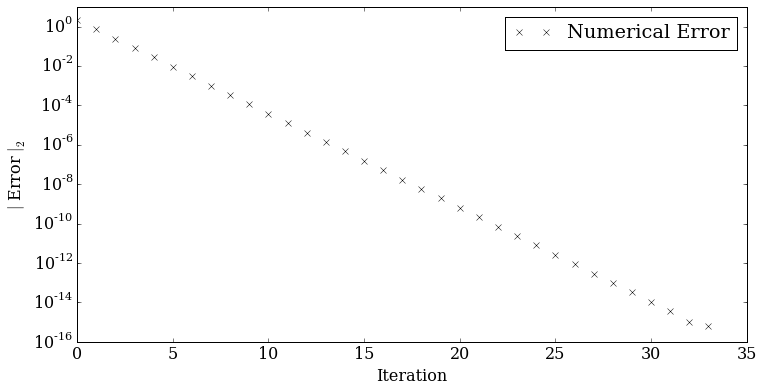

In [4]:
err = np.linalg.norm(x - np.tile(np.array([1.0, 2.0]), [101, 1]), 2, axis = 1)
imax = np.max([i for i in range(len(err)) if err[i] > 1.0e-20])
plt.figure()
plt.semilogy(range(imax), err[:imax], 'kx', label = 'Numerical Error')
plt.xlabel('Iteration')
plt.ylabel('$\|$ Error $\|_2$')
plt.legend()
plt.show()

## Gauss-Seidel

In the Gauss-Seidel method split the coefficient matrix as

$$A = I - (A_L + A_U)$$

as before. Choose

$$\begin{aligned}
    N & = I - A_L, \\
    P & = A_U.
  \end{aligned}$$

This makes the iteration scheme

$${\boldsymbol{x}}^{(i)} =  A_L {\boldsymbol{x}}^{(i)} + A_U {\boldsymbol{x}}^{(i - 1)} + {\boldsymbol{b}}, \quad i = 1,
    2, \dots$$

Written in this form as $A_L$ *strictly* lower triangular. Consider each
component of the iteration scheme from the top down: each coefficient of
${\boldsymbol{x}}^{(i)}$ is computed on the left before it is used on
the right.

### Example


As above we look at

$$\begin{pmatrix}
      3 & 1 \\
      1 & 3
    \end{pmatrix}
    \begin{pmatrix}
      x_1 \\ x_2
    \end{pmatrix} =
    \begin{pmatrix}
      5 \\ 7
    \end{pmatrix} \rightarrow     
    \begin{pmatrix}
      1 & \tfrac{1}{3} \\
      \tfrac{1}{3} & 1 \\
    \end{pmatrix}
    \begin{pmatrix}
      x_1 \\ x_2
    \end{pmatrix} =
    \begin{pmatrix}
      \tfrac{5}{3} \\ \tfrac{7}{3}
    \end{pmatrix}.$$

We have

$$A_L =
    \begin{pmatrix}
      0 & 0 \\
      -1/3 & 0
    \end{pmatrix}, \quad
    A_U =
    \begin{pmatrix}
      0 & -1/3 \\
      0 & 0
    \end{pmatrix}$$

and hence the iteration algorithm becomes

$$\begin{aligned}
    \begin{pmatrix}
      x_1^{(i)} \\ x_2^{(i)}
    \end{pmatrix} & = \frac{1}{3} \left[
      \begin{pmatrix}
        -x_2^{(i-1)} \\ - x_1^{(i)}
      \end{pmatrix} +
      \begin{pmatrix}
        5 \\ 7
      \end{pmatrix} \right] 
    = \frac{1}{3}
    \begin{pmatrix}
      5 - x_2^{(i-1)} \\ 7 - x_1^{(i)}
    \end{pmatrix}.
  \end{aligned}$$

If read row-by-row from the top we have always computed the
${\boldsymbol{x}}^{(i)}$ entries before they are used.

The sequence has entries

|  $i$    |  $x_1$       |   $x_2$      |
|:-------:|:------------:|:------------:|
|    $0$  |     $0$      |    $0$       |
|    $1$  |   $5 / 3$    |  $16 / 9$    |
|    $2$  |  $1.074074$  | $1.975309$   |
|    $5$  |  $1.000102$  | $1.999966$   |
|   $10$  |  $1.000000$  | $2.000000$   |
|   $100$ |  $1.000000$  | $2.000000$   |

A starting “guess” of ${\boldsymbol{x}} = {\boldsymbol{0}}$ appears to
converge to ${\boldsymbol{x}}
  = (1, 2)^T$. The convergence is exponential with a slope $\sim 2$,
much faster than Jacobi’s Method.


In [5]:
x = np.zeros((101, 2)) # First index is the iteration number. Second index is the component
x[0, :] = 0.0

for i in range(1, 101):
    x[i, 0] = 5.0 / 3.0 - x[i-1, 1] / 3.0
    x[i, 1] = 7.0 / 3.0 - x[i  , 0] / 3.0

for i in [0, 1, 2, 5, 10, 100]:
    print("Solution at i = {} is x = ( {}, {} ).".format(i, x[i, 0], x[i, 1]))

Solution at i = 0 is x = ( 0.0, 0.0 ).
Solution at i = 1 is x = ( 1.6666666666666667, 1.777777777777778 ).
Solution at i = 2 is x = ( 1.074074074074074, 1.9753086419753088 ).
Solution at i = 5 is x = ( 1.0001016105268508, 1.9999661298243832 ).
Solution at i = 10 is x = ( 1.000000001720783, 1.9999999994264057 ).
Solution at i = 100 is x = ( 1.0, 2.0 ).


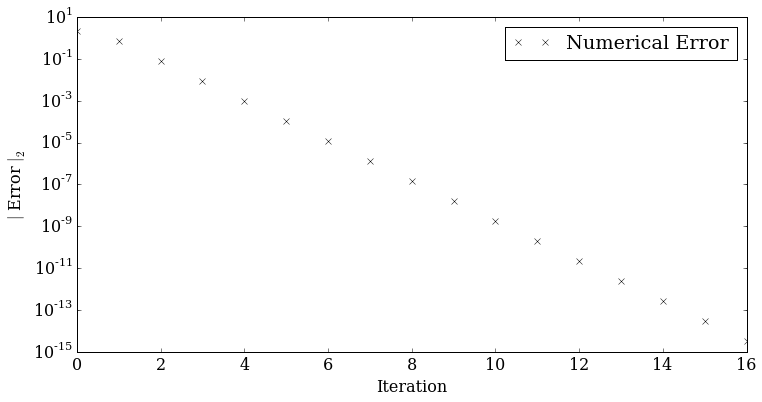

In [6]:
err = np.linalg.norm(x - np.tile(np.array([1.0, 2.0]), [101, 1]), 2, axis = 1)
imax = np.max([i for i in range(len(err)) if err[i] > 1.0e-20])
plt.figure()
plt.semilogy(range(imax), err[:imax], 'kx', label = 'Numerical Error')
plt.xlabel('Iteration')
plt.ylabel('$\|$ Error $\|_2$')
plt.legend()
plt.show()

## Successive Over Relaxation


View the sequence as repeated “corrections” to the previous term,

$${\boldsymbol{x}}^{(i)} = {\boldsymbol{x}}^{(i-1)} + {\boldsymbol{c}},$$

where correction is based e.g. on Gauss-Seidel method,

$${\boldsymbol{c}} = A_L {\boldsymbol{x}}^{(i)} + (A_U - I) {\boldsymbol{x}}^{(i-1)} + {\boldsymbol{b}}.$$

Modify correction by factor $\omega$:

$${\boldsymbol{x}}^{(i)} = {\boldsymbol{x}}^{(i-1)} + \omega {\boldsymbol{c}}.$$

*A priori* best value of $\omega$ not clear. Typically it is set close
to one. However, poor choices may cause the algorithm to diverge!


### Example


Solving the previous example using $\omega = 1.035$, the sequence has
entries

|    $i$  |    $x_1$     |   $x_2$      |
|:-------:|:------------:|:------------:|
|    $0$  |     $0$      |    $0$       |
|    $1$  |  $1.725000$  | $1.819875$   |
|    $2$  |  $1.036768$  | $1.993619$   |
|    $5$  |  $0.999999$  | $2.000000$   |
|   $10$  |  $1.000000$  | $2.000000$   |
|   $100$ |  $1.000000$  | $2.000000$   |

A starting “guess” of ${\boldsymbol{x}} = {\boldsymbol{0}}$ appears to
converge to ${\boldsymbol{x}}
  = (1, 2)^T$. The convergence is exponential with a slope $\sim 3$, the
fastest method so far.


In [7]:
x = np.zeros((101, 2)) # First index is the iteration number. Second index is the component
x[0, :] = 0.0

omega = 1.035

for i in range(1, 101):
    x[i, 0] = x[i-1, 0] + omega * ( 5.0 / 3.0 - x[i-1, 1] / 3.0 - x[i-1, 0] )
    x[i, 1] = x[i-1, 1] + omega * ( 7.0 / 3.0 - x[i  , 0] / 3.0 - x[i-1, 1] )

for i in [0, 1, 2, 5, 10, 100]:
    print("Solution at i = {} is x = ( {}, {} ).".format(i, x[i, 0], x[i, 1]))

Solution at i = 0 is x = ( 0.0, 0.0 ).
Solution at i = 1 is x = ( 1.7249999999999999, 1.8198750000000001 ).
Solution at i = 2 is x = ( 1.036768125, 1.993619371875 ).
Solution at i = 5 is x = ( 0.9999988694806217, 2.000000274589937 ).
Solution at i = 10 is x = ( 1.0000000000000828, 1.999999999999986 ).
Solution at i = 100 is x = ( 1.0, 2.0 ).


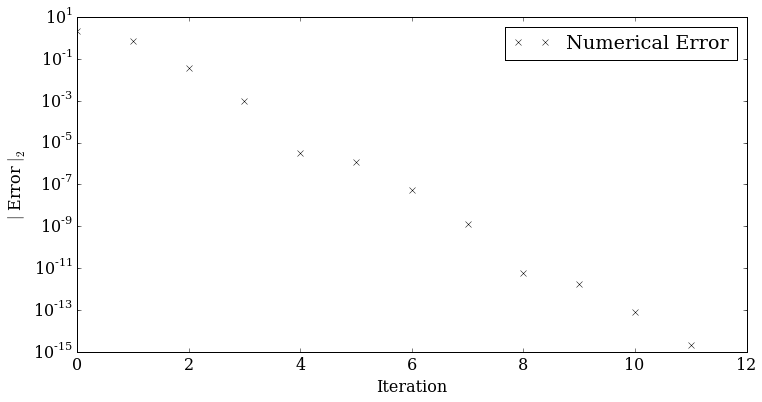

In [8]:
err = np.linalg.norm(x - np.tile(np.array([1.0, 2.0]), [101, 1]), 2, axis = 1)
imax = np.max([i for i in range(len(err)) if err[i] > 1.0e-20])
plt.figure()
plt.semilogy(range(imax), err[:imax], 'kx', label = 'Numerical Error')
plt.xlabel('Iteration')
plt.ylabel('$\|$ Error $\|_2$')
plt.legend()
plt.show()

However, using $\omega = 1.2$, the sequence has entries

|    $i$  |    $x_1$     |   $x_2$      |
|:-------:|:------------:|:------------:|
|    $0$  |     $0$      |    $0$       |
|    $1$  |  $2.000000$  | $2.000000$   |
|    $2$  |  $0.800000$  | $2.080000$   |
|    $5$  |  $0.998221$  | $2.000430$   |
|   $10$  |  $1.000000$  | $2.000000$   |
|   $100$ |  $1.000000$  | $2.000000$   |


A starting “guess” of ${\boldsymbol{x}} = {\boldsymbol{0}}$ appears to
converge to ${\boldsymbol{x}}
  = (1, 2)^T$. The convergence is exponential with a slope $\sim 1.6$,
which is not as good as Gauss-Seidel.


In [9]:
x = np.zeros((101, 2)) # First index is the iteration number. Second index is the component
x[0, :] = 0.0

omega = 1.2

for i in range(1, 101):
    x[i, 0] = x[i-1, 0] + omega * ( 5.0 / 3.0 - x[i-1, 1] / 3.0 - x[i-1, 0] )
    x[i, 1] = x[i-1, 1] + omega * ( 7.0 / 3.0 - x[i  , 0] / 3.0 - x[i-1, 1] )

for i in [0, 1, 2, 5, 10, 100]:
    print("Solution at i = {} is x = ( {}, {} ).".format(i, x[i, 0], x[i, 1]))

Solution at i = 0 is x = ( 0.0, 0.0 ).
Solution at i = 1 is x = ( 2.0, 2.0000000000000004 ).
Solution at i = 2 is x = ( 0.8, 2.08 ).
Solution at i = 5 is x = ( 0.9982207999999999, 2.00043008 ).
Solution at i = 10 is x = ( 1.0000000160419023, 2.000000225675051 ).
Solution at i = 100 is x = ( 1.0, 2.0 ).


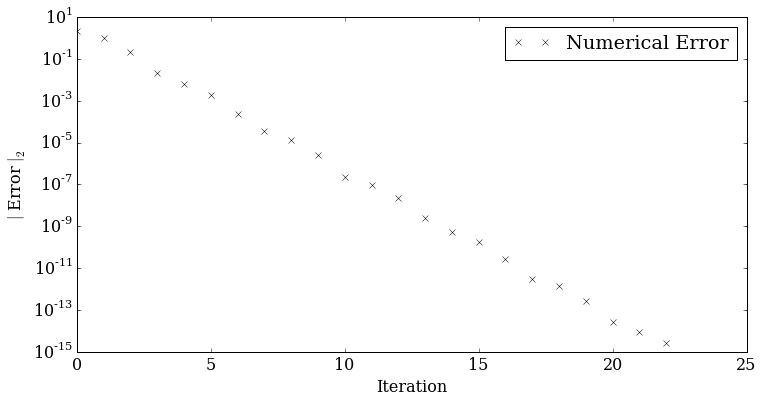

In [10]:
err = np.linalg.norm(x - np.tile(np.array([1.0, 2.0]), [101, 1]), 2, axis = 1)
imax = np.max([i for i in range(len(err)) if err[i] > 1.0e-20])
plt.figure()
plt.semilogy(range(imax), err[:imax], 'kx', label = 'Numerical Error')
plt.xlabel('Iteration')
plt.ylabel('$\|$ Error $\|_2$')
plt.legend()
plt.show()

### The relaxation parameter

The convergence behaviour depends in a highly non-trivial way on $\omega$.

SOR algorithms are much harder to analyze than Jacobi or Gauss-Seidel.

Compare the convergence rate after four iterations for different values of $\omega$.

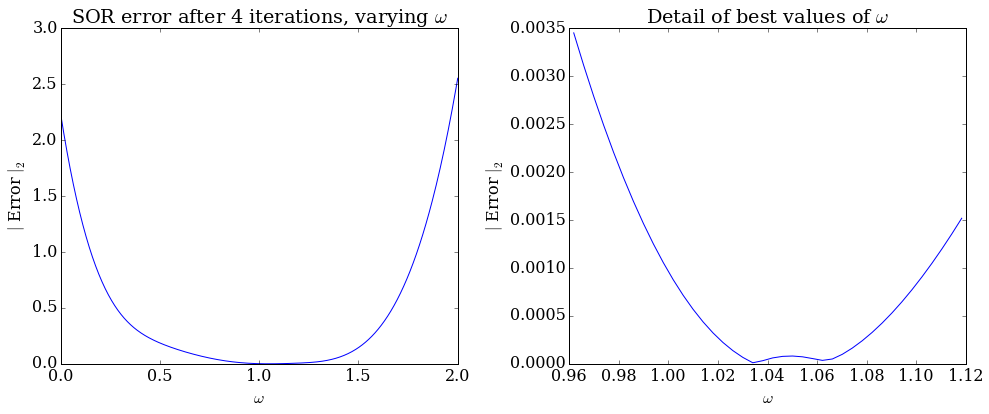

In [11]:
all_omega = np.linspace(0.0, 2.0, 500)
err = np.zeros_like(all_omega)

for om in range(len(all_omega)):
    x = np.zeros((5, 2)) # First index is the iteration number. Second index is the component
    x[0, :] = 0.0
    omega = all_omega[om]
    
    for i in range(1, 5):
        x[i, 0] = x[i-1, 0] + omega * ( 5.0 / 3.0 - x[i-1, 1] / 3.0 - x[i-1, 0] )
        x[i, 1] = x[i-1, 1] + omega * ( 7.0 / 3.0 - x[i  , 0] / 3.0 - x[i-1, 1] )

    err[om] = np.linalg.norm( x[-1, :] - np.array([1.0, 2.0]), 2)

plt.figure(figsize = (14, 6))
plt.subplot(121)
plt.plot(all_omega, err)
plt.xlabel('$\omega$')
plt.ylabel('$\|$ Error $\|_2$')
plt.title('SOR error after 4 iterations, varying $\omega$')
plt.subplot(122)
plt.plot(all_omega[240:280], err[240:280])
plt.xlabel('$\omega$')
plt.ylabel('$\|$ Error $\|_2$')
plt.title('Detail of best values of $\omega$')
plt.tight_layout()
plt.show()

## Convergence analysis


Two theorems about *when* these methods will work:

**Theorem 1**: If the coefficient matrix $A$ is *strictly* diagonally dominant then
both the Jacobi method and the Gauss-Seidel method will converge.

**Theorem 2**: If the coefficient matrix $A$ is symmetric and positive definite then
the Gauss-Seidel method will converge.


# Other matrix operations

We have so far only considered the linear system

$$A {\boldsymbol{x}} = {\boldsymbol{b}}.$$

We have given methods to solve this system accurately without computing
the matrix inverse or determinant. However, these methods can also be
used to efficiently and accurately compute these quantities.

## Determinants

Given the $LU$ decomposition we have

$$\det (A) = \det(L) \times \det(U), \quad \text{and} \quad \det(U)
    = \prod_{i=1}^n u_{ii}.$$

Choose $\ell_{ii}=1$ giving $\det(L) = 1$: determinant follows.

Similarly Gaussian elimination with partial pivoting gives

$$\det(A) = \pm \prod_{i=1}^n u_{ii},$$

where the sign depends on the number of row swaps performed.

**Note:**

Gaussian elimination, and hence finding the determinant, is an
${\cal O}(n^3)$ operation. The expansion in minors is an ${\cal O}(n!)$
operation.

## Matrix inversion

Solving for the matrix inverse can be written as a set of linear system
problems. We write

$$A A^{-1} = I$$

and consider each column of $A^{-1}$ as a separate problem. Writing
${\boldsymbol{c}}_i$ for the (unknown) column of $A^{-1}$ we have

$$A {\boldsymbol{c}}_i =
    \begin{pmatrix}
       \vdots \\ 0 \\ 1 \\ 0 \\ \vdots
    \end{pmatrix}$$

where the $1$ appears in the $i^{\text{th}}$ row.

This finds the inverse by solving $n$ linear systems, which is much
faster than evaluating the $n+1$ determinants required by Cramer’s rule.